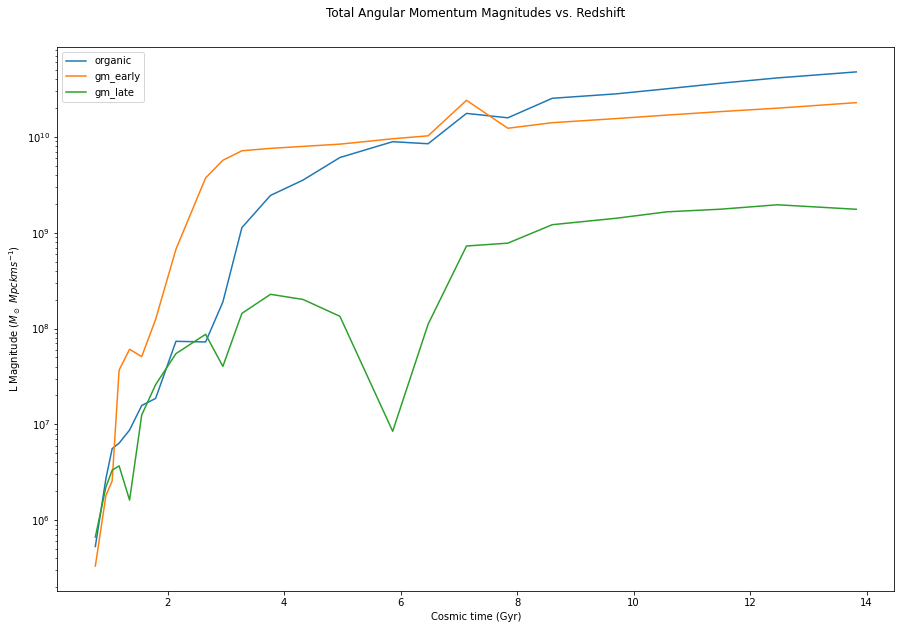

In [2]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_early', 'gm_late']
datasetNo = 0
galaxyAm = np.array(range(144), dtype=float).reshape(3, 24, 2)

for dataset in datasets:

    files = listdir('data/' + dataset)

    count = 0
    
    for file in files:
       
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        #Calculate the angular momentum of every particle in the array using vectorisation
        mv = np.multiply(ds_m, np.transpose(ds_v))
        angMom = np.cross(ds_c, np.transpose(mv))

        # Get the vector norm to give the size of the vector, i.e.
        angMomTot = np.linalg.norm(angMom, axis=1)

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[datasetNo, count, 0] = redshift
        galaxyAm[datasetNo, count, 1] = np.sum(angMomTot)
              
        count = count + 1
    
    datasetNo = datasetNo + 1    

# Read data for the redshift->time lookup table
df_o = pd.read_csv('halo_catalogue_organic.txt', delimiter='\t')
df_r2t = df_o[["time [Gyr]"]].copy()
df_r2t = df_r2t.drop(df_r2t.index[range(0,3)])
times = df_r2t.to_numpy()

fig, ax1 = plt.subplots()
fig.set_size_inches(15,10)
plt.title('Total Angular Momentum Magnitudes vs. Redshift', pad=30)
plt.xlabel('Cosmic time (Gyr)')
plt.ylabel(r'L Magnitude ($M_\odot\ Mpc km s^{-1})$')
plt.ticklabel_format(axis='y', style='sci', useMathText=True)
#plt.rcParams["figure.figsize"] = (12,10)
plt.plot(times, galaxyAm[0, 0:, 1], label='Organic')
plt.plot(times, galaxyAm[1, 0:, 1], label='gm_late')
plt.plot(times, galaxyAm[2, 0:, 1], label='gm_early')
plt.semilogy()
plt.legend(['organic', 'gm_early', 'gm_late'])
plt.show()  